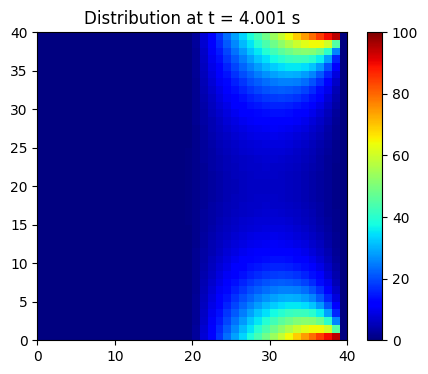

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output


# Defining our problem

a = 110
length = 50 #mm
time = 4 #seconds
nodes = 40

# Initialization

dx = length / (nodes-1)
dy = length / (nodes-1)

dt = min(   dx**2 / (4 * a),     dy**2 / (4 * a))

t_nodes = int(time/dt) + 1

u = np.zeros((nodes, nodes)) + 20 # Plate is initially as 20 degres C

# Boundary Conditions
#linspace(temp at adjacent corner, temp at opposite corner)

u[0, :] = np.linspace(-100, 100, nodes) #top edge
u[-1, :] = np.linspace(-100, 100, nodes) #bottom edge

u[:, 0] = np.linspace(0, 0, nodes) #left edge
u[:, -1] = np.linspace(0, 0, nodes) #right edge

# Visualizing with a plot

fig, axis = plt.subplots()

pcm = axis.pcolormesh(u, cmap=plt.cm.jet, vmin=0, vmax=100)
plt.colorbar(pcm, ax=axis)

# Simulating

counter = 0

while counter < time:

    w = u.copy()

    for i in range(1, nodes - 1):
        for j in range(1, nodes - 1):
            dd_ux = (w[i-1, j] - 2*w[i, j] + w[i+1, j]) / dx**2
            dd_uy = (w[i, j-1] - 2*w[i, j] + w[i, j+1]) / dy**2
            u[i, j] = dt * a * (dd_ux + dd_uy) + w[i, j]

    counter += dt

    print("t: {:.3f} [s], Average temperature: {:.2f} °C".format(counter, np.average(u)))

    # Update plot for Colab
    clear_output(wait=True)
    plt.figure(figsize=(5, 4))
    plt.pcolormesh(u, cmap=plt.cm.jet, vmin=0, vmax=100)
    plt.colorbar()
    plt.title(f"Distribution at t = {counter:.3f} s")
    plt.show()

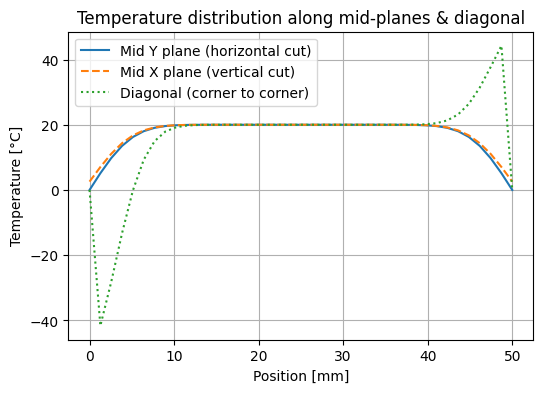

In [ ]:
midRow = nodes // 2   # center row (y-direction midplane)
midCol = nodes // 2   # center column (x-direction midplane)

x = np.linspace(0, length, nodes)  # x positions
y = np.linspace(0, length, nodes)  # y positions

# Diagonal coordinates (same for x and y since it's square)
diag = np.linspace(0, length, nodes)

plt.figure(figsize=(6,4))

# Horizontal mid-plane
plt.plot(x, u[midRow, :], label="Mid Y plane (horizontal cut)")

# Vertical mid-plane
plt.plot(y, u[:, midCol], label="Mid X plane (vertical cut)", linestyle="--")

# Diagonal (top-left to bottom-right)
plt.plot(diag, u[range(nodes), range(nodes)], label="Diagonal (corner to corner)", linestyle=":")

plt.xlabel("Position [mm]")
plt.ylabel("Temperature [°C]")
plt.title("Temperature distribution along mid-planes & diagonal")
plt.legend()
plt.grid(True)
plt.show()
